In [1]:
import torch
import torch.nn as nn
from networks import Transformer
from runners import Runner
from utils import get_batch
import matplotlib.pyplot as plt

if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# device = "cpu"
print(f"Using device: {device}")

%load_ext autoreload
%autoreload 2


Using device: mps


In [9]:
from torch._subclasses.fake_impls import data_dep


def load_shakespeare():
    with open("shakespeare.txt", "r", encoding="utf-8") as f:
        text = f.read()

    chars = sorted(list(set(text)))
    vocab_size = len(chars)

    char_to_index = {ch: i for i, ch in enumerate(chars)}
    index_to_char = {i: ch for i, ch in enumerate(chars)}
    def encode(s): return [char_to_index[c] for c in s]
    def decode(l): return "".join([index_to_char[i] for i in l])
    return text, vocab_size, encode, decode

text, vocab_size, encode, decode = load_shakespeare()
data = torch.tensor(encode(text))
n = int(0.9 * len(data))
train_data, val_data = data[:n], data[n:]
block_size = 50
batch_size = 64

x, y = get_batch(train_data, block_size, batch_size)


In [10]:
x, y = get_batch(train_data, block_size, batch_size)
print("INPUT\n", "="*100, "\n", decode(x[1].tolist()))
print("OUTPUT\n", "="*100, "\n", decode(y[1].tolist()))

INPUT
 vilely.
Fare thee well. Thou art a piece of virtue
OUTPUT
 ilely.
Fare thee well. Thou art a piece of virtue,


In [4]:
iters = 1000
net = Transformer(vocab_size, embedding_size = 32, num_heads = 1, num_layers = 1, block_size = 80, dropout=0.1).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(net.parameters(), lr=1e-3)
runner = Runner(net, loss_fn, optimizer, device, metric_freq = 100)
runner.train(train_data, val_data, batch_size = 500, iters = 5000)

Iteration 0, Loss: 4.723592281341553, Accuracy: 0.006874999962747097
Validation Loss: 4.697737693786621, Validation Accuracy: 0.007199999876320362
Iteration 100, Loss: 3.1708147525787354, Accuracy: 0.18747499585151672
Validation Loss: 3.1285274028778076, Validation Accuracy: 0.18872499465942383
Iteration 200, Loss: 2.907073736190796, Accuracy: 0.21889999508857727
Validation Loss: 2.8739781379699707, Validation Accuracy: 0.22130000591278076
Iteration 300, Loss: 2.7164037227630615, Accuracy: 0.24580000340938568
Validation Loss: 2.722637891769409, Validation Accuracy: 0.2452249974012375
Iteration 400, Loss: 2.6398510932922363, Accuracy: 0.2549999952316284
Validation Loss: 2.6366915702819824, Validation Accuracy: 0.25532498955726624
Iteration 500, Loss: 2.4982144832611084, Accuracy: 0.30367499589920044
Validation Loss: 2.5044500827789307, Validation Accuracy: 0.296750009059906
Iteration 600, Loss: 1.3614391088485718, Accuracy: 0.6781499981880188
Validation Loss: 1.3399226665496826, Validat

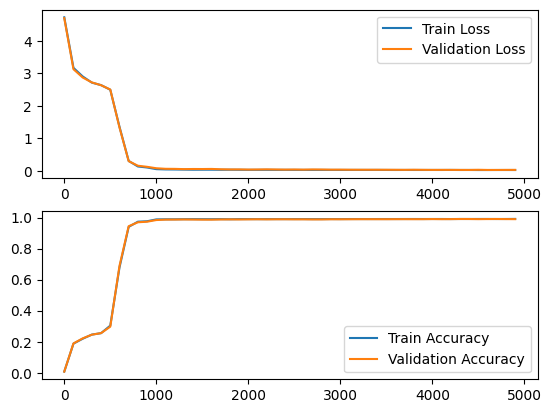

In [5]:
runner.plot_metrics()

In [12]:
string_input = "\nOMELETTE\n To fry, or not to fry?"
predict = runner.generate(string_input, encode, decode, max_new_tokens = 500)
print(predict)

																																															
OMELETTE
 To fry, or not to fry?
Omesen.
Kar we serest helouckery ind!
HIRD.
“ODG haer re! I so fof?]
O.
But Fhe fr cime Ce
AJ thelfes na aruiriben.
By BA Princyifod mofldean.
Wh Ho youse
NITAnt,
NONInd
And Mouck yous
PENRLLNATheqran1 beay we han norat
NOS. whll.
Aneoritlin’,
BOThig Maatefeasentermeneroure,
WLOWld, Sene ther. ly four cacer.
CEgouch hibe wavin

WAMAd?
ANI
Y. Baeyq
NPSOPAmic, hay soud prou



CEESITHIESTONIOWh, ARyanouset Ir to the nooud kackindel sous nuhet hans a, are cofite.

OUSr!
HER_ERAR5

ERRIN.
ERORI hes
